In [2]:

import os
import cv2
import random
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier

In [3]:
Data_path = r"C:\Users\abdul\Downloads\CIFAR-10-images-master\test"
Test_path = r"C:\Users\abdul\Downloads\CIFAR-10-images-master\train2"

cat = os.listdir(Data_path)
Train_data = []

# Load and preprocess training data
for c in cat:
    path = os.path.join(Data_path, c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        img_arr_resize = cv2.resize(img_arr, (32, 32))  # Resized to 32x32
        # Flatten the image into a 1D array
        img_arr_flat = img_arr_resize.flatten()
        Train_data.append((img_arr_flat, cat.index(c)))

random.shuffle(Train_data)
# Prepare X and Y for training data
X = [item[0] for item in Train_data]
Y = [item[1] for item in Train_data]


100%|██████████| 1000/1000 [00:00<00:00, 7136.71it/s]


In [4]:
Test_data = []

# Load and preprocess test data
for c in cat:
    path = os.path.join(Test_path, c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        img_arr_resize = cv2.resize(img_arr, (32, 32))  # Resized to 32x32
        # Flatten the image into a 1D array
        img_arr_flat = img_arr_resize.flatten()
        Test_data.append((img_arr_flat, cat.index(c)))
random.shuffle(Test_data)

100%|██████████| 200/200 [00:00<00:00, 7503.50it/s]


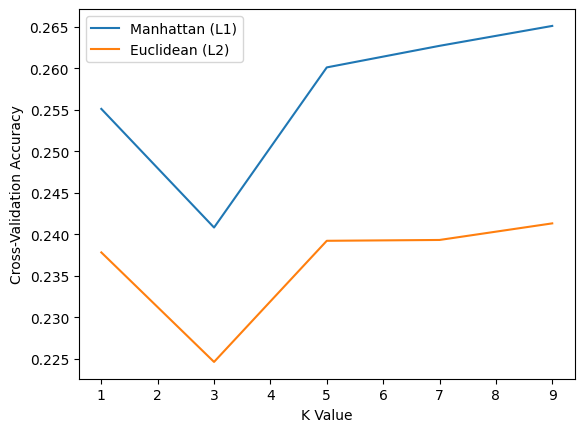

K = 1, Manhattan Accuracy: 0.2551, Euclidean Accuracy: 0.2378
K = 3, Manhattan Accuracy: 0.2408, Euclidean Accuracy: 0.2246
K = 5, Manhattan Accuracy: 0.2601, Euclidean Accuracy: 0.2392
K = 7, Manhattan Accuracy: 0.26270000000000004, Euclidean Accuracy: 0.23929999999999998
K = 9, Manhattan Accuracy: 0.2651, Euclidean Accuracy: 0.2413


In [5]:

results_manhattan = []
results_euclidean = []


k_values = [1, 3, 5, 7, 9]


for k in k_values:
    knn_manhattan = KNeighborsClassifier(n_neighbors=k, p=1) 
    knn_euclidean = KNeighborsClassifier(n_neighbors=k, p=2)  


    kfold = KFold(n_splits=5) 
    scores_manhattan = cross_val_score(knn_manhattan, X, Y, cv=kfold)
    scores_euclidean = cross_val_score(knn_euclidean, X, Y, cv=kfold)


    results_manhattan.append(np.mean(scores_manhattan))
    results_euclidean.append(np.mean(scores_euclidean))

plt.plot(k_values, results_manhattan, label='Manhattan (L1)')
plt.plot(k_values, results_euclidean, label='Euclidean (L2)')
plt.xlabel('K Value')
plt.ylabel('Cross-Validation Accuracy')
plt.legend()
plt.show()

# Print and compare the results
for i, k in enumerate(k_values):
    print(f"K = {k}, Manhattan Accuracy: {results_manhattan[i]}, Euclidean Accuracy: {results_euclidean[i]}")